# Import Packages

In [ ]:
!pip install seaborn wordcloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # We use regular expressions for data cleaning
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import jaccard_score
from nltk.metrics import edit_distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")


# Exploratory Data Analysis

#### 1.Data Overview

In [ ]:
Quora = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')


In [ ]:
print(Quora.isna().sum())
Quora.dropna(inplace=True)
Quora

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket programming language of the latest version?,How many keywords are there in PERL Programming Language in the latest version?,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,"What is the approx annual cost of living while studying in UIC Chicago, for an Indian student?","I am having little hairfall problem but I want to use hair styling product. Which one should I prefer out of gel, wax and clay?",0


#### 4.Correlation Analysis

In [ ]:
from nltk.metrics import jaccard_distance
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assuming 'question1' and 'question2' are the columns in your DataFrame
# and 'is_duplicate' is the column indicating whether the questions are duplicates or not.

# Filter the DataFrame to include only rows where is_duplicate is 1
duplicate_questions = Quora[Quora['is_duplicate'] == 1].sample(frac=1/3, random_state=42)  # Adjust the fraction and random_state as needed

# Create a CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(duplicate_questions['question1'] + duplicate_questions['question2'])

# Vectorize the questions
q1_vectorized = vectorizer.transform(duplicate_questions['question1'])
q2_vectorized = vectorizer.transform(duplicate_questions['question2'])

# Convert to binary format
q1_binary = np.asarray(q1_vectorized.toarray(), dtype=bool).astype(int)
q2_binary = np.asarray(q2_vectorized.toarray(), dtype=bool).astype(int)

# Flatten the arrays
q1_flat = q1_binary.ravel()
q2_flat = q2_binary.ravel()

# Calculate Jaccard similarity using NLTK
jaccard_similarity = 1 - jaccard_distance(set(q1_flat), set(q2_flat))

print(f"Jaccard Similarity between a fraction of duplicate questions: {jaccard_similarity}")


Jaccard Similarity between a fraction of duplicate questions: 1.0


Jaccard Similarity score =1 indicates that the same vocabulary is shared between the two questions .  

In [ ]:
vectorizer = CountVectorizer()
duplicate_questions = Quora[Quora['is_duplicate'] == 1].sample(frac=0.5)
vectorizer.fit(duplicate_questions['question1'] + duplicate_questions['question2'])

# Vectorize all questions
all_questions_vectorized = vectorizer.transform(duplicate_questions['question1'] + duplicate_questions['question2']).toarray().astype(bool)

# Reset index for proper alignment
duplicate_questions = duplicate_questions.reset_index(drop=True)
all_questions_vectorized_df = pd.DataFrame(all_questions_vectorized)

jaccard_similarities = []
levenshtein_distances = []

for i in range(len(duplicate_questions)):
    row_vectorized = vectorizer.transform([duplicate_questions['question1'][i] + duplicate_questions['question2'][i]]).toarray().astype(bool).ravel()

    # Calculate Levenshtein distance
    levenshtein_distance = edit_distance(duplicate_questions['question1'][i], duplicate_questions['question2'][i])
    levenshtein_distances.append(levenshtein_distance)

# Add Jaccard similarities and Levenshtein distances to the DataFrame
duplicate_questions['levenshtein_distance'] = levenshtein_distances

In [ ]:
duplicate_questions['levenshtein_distance'] = levenshtein_distances

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

duplicate_questions = Quora[Quora['is_duplicate'] == 1]
# Create a CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(duplicate_questions['question1'] + duplicate_questions['question2'])

# Vectorize all questions
all_questions_vectorized = vectorizer.transform(duplicate_questions['question1'] + duplicate_questions['question2']).toarray().astype(bool)

# Reset index for proper alignment
duplicate_questions = duplicate_questions.reset_index(drop=True)
all_questions_vectorized_df = pd.DataFrame(all_questions_vectorized)

# Calculate Jaccard similarity between rows using scikit-learn
jaccard_similarities = []

for i in range(len(duplicate_questions)):
    row_vectorized = vectorizer.transform([duplicate_questions['question1'][i] + duplicate_questions['question2'][i]]).toarray().astype(bool).ravel()

    # Calculate Jaccard similarity
    jaccard_similarity = jaccard_score(row_vectorized, all_questions_vectorized_df.loc[i], average='binary')
    jaccard_similarities.append(jaccard_similarity)

# Add Jaccard similarities to the DataFrame
duplicate_questions['jaccard_similarity'] = jaccard_similarities


In [ ]:
vectorizer = CountVectorizer()
non_duplicate_questions = Quora[Quora['is_duplicate'] == 0].sample(frac=0.5,random_state=1)
vectorizer.fit(non_duplicate_questions['question1'] + non_duplicate_questions['question2'])

# Vectorize all questions
all_questions_vectorized = vectorizer.transform(non_duplicate_questions['question1'] + non_duplicate_questions['question2']).toarray().astype(bool)

# Reset index for proper alignment
non_duplicate_questions = non_duplicate_questions.reset_index(drop=True)
all_questions_vectorized_df = pd.DataFrame(all_questions_vectorized)

jaccard_similarities = []
levenshtein_distances = []

for i in range(len(non_duplicate_questions)):
    row_vectorized = vectorizer.transform([non_duplicate_questions['question1'][i] + non_duplicate_questions['question2'][i]]).toarray().astype(bool).ravel()

    # Calculate Levenshtein distance
    levenshtein_distance = edit_distance(non_duplicate_questions['question1'][i], non_duplicate_questions['question2'][i])
    levenshtein_distances.append(levenshtein_distance)

# Add Jaccard similarities and Levenshtein distances to the DataFrame
non_duplicate_questions['levenshtein_distance'] = levenshtein_distances

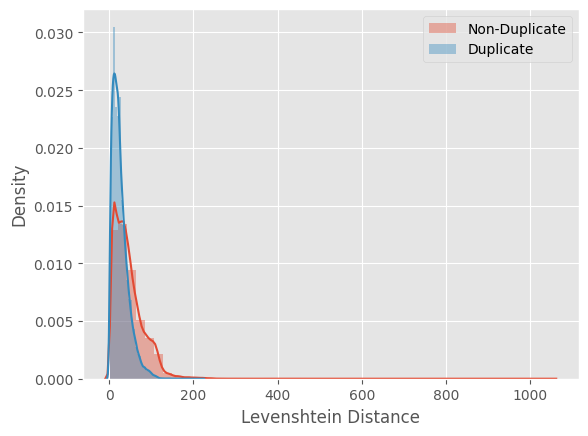

In [ ]:
df_non_duplicate = non_duplicate_questions.groupby('is_duplicate')['levenshtein_distance'].agg(['min', 'max', 'median', 'mean', 'std'])
df_duplicate = duplicate_questions.groupby('is_duplicate')['levenshtein_distance'].agg(['min', 'max', 'median', 'mean', 'std'])

# Combine the results
df_combined = df_non_duplicate.add(df_duplicate, fill_value=0)
df_combined
sns.distplot(non_duplicate_questions['levenshtein_distance'], bins=50, label='Non-Duplicate')
sns.distplot(duplicate_questions['levenshtein_distance'], bins=50, label='Duplicate')

# Add labels and legend
plt.xlabel('Levenshtein Distance')
plt.ylabel('Density')  # You may use 'Frequency' or 'Probability' depending on your preference
plt.legend()

# Show the plot
plt.show()

The summary statistics for the **Levenshtein distance** between `non-duplicate` and `duplicate` questions are as follows. For `non-duplicate` questions, the Levenshtein distance ranges from 1 to 1051, with a median value of 38, mean value of approximately 46.46, and a standard deviation of about 35.98. The Levenshtein distances for `non-duplicate` questions tend to have higher variability compared to `duplicate questions`, as indicated by the larger standard deviation.

In [ ]:
from scipy.stats import mannwhitneyu

# Assuming df is your DataFrame with the 'levenshtein_distance' column
levenshtein_values = duplicate_questions['levenshtein_distance']

# Define the null hypothesis value (e.g., 0 if you are testing equality to 0)
null_hypothesis_value = 10

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(levenshtein_values, null_hypothesis_value, alternative='greater')

# Print the results
print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Check the significance level (e.g., 0.05)
if p_value < 0.1:
    print("Reject the null hypothesis: Levenshtein distance is different from the null hypothesis value.")
else:
    print("Fail to reject the null hypothesis: Levenshtein distance is equal to the null hypothesis value.")

In [ ]:
from scipy.stats import ttest_1samp

# Assuming df is your DataFrame with the 'jaccard_similarity' column
jaccard_values = duplicate_questions['jaccard_similarity']

# Perform a one-sample t-test
t_statistic, p_value = ttest_1samp(jaccard_values, 1)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: Jaccard similarity is different from 1.")
else:
    print("Fail to reject the null hypothesis: Jaccard similarity is equal to 1.")
